In [34]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor

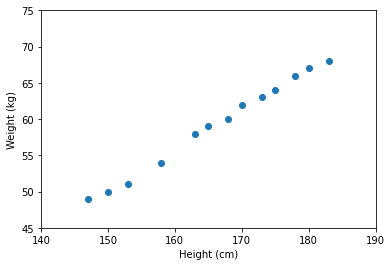

In [29]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# Visualize data 
plt.scatter(X, y)
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

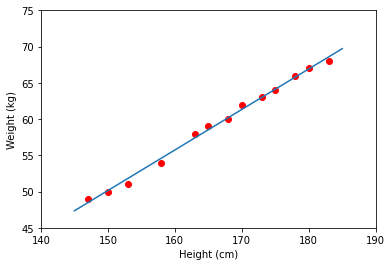

In [13]:
Xbar = np.hstack((np.ones((X.shape[0], 1)), X))
A = Xbar.T @ Xbar
b = Xbar.T @ y
w = np.linalg.pinv(A) @ b

w0, w1 = w[0], w[1]
# Preparing the fitting line 
x0 = np.linspace(145, 185, 2)
y0 = w0 + w1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [17]:
# Scikit-learn
model = LinearRegression(fit_intercept=False)
model.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', model.coef_)
print( 'Solution found our solution: ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found our solution:  [[-33.73541021   0.55920496]]


[147 150 153 158 163 165 168 170 173 175 178 180 183 150 150 150]


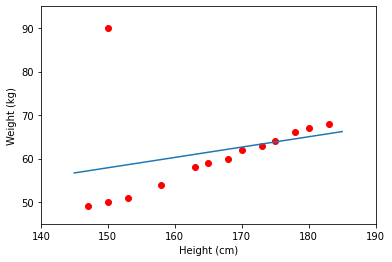

In [40]:
# Nhạy cảm với nhiễu (sensitive to noise)
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90]]).T

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)

# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X, y, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()